In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
station = session.query(Station).first()
station.__dict__

precipitation_yr = session.query(Measurement).first()
precipitation_yr.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x158a9b0b908>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation_yr = session.query(Measurement).first()
precipitation_yr.__dict__

# Calculate the date 1 year ago from the last data point in the database
precipitation = engine.execute("SELECT date, prcp FROM Measurement WHERE date >='2016-08-23' AND date <='2017-08-23'").fetchall()
precipitation

# Perform a query to retrieve the data and precipitation scores
# for row in session.query(Measurement.prcp, Measurement.date).filter(Measurement.date.between('2016-08-23','2017-08-23')):
#     print(row)

measurement_by_date = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).statement

df1 = pd.read_sql_query(measurement_by_date, session.bind)
df1.head()

,prcp,date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27


In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df1 = pd.read_sql_query(measurement_by_date, session.bind)
df1.columns = ['precipitation', 'date']
df1.groupby(['date']).precipitation.sum()
df1.set_index('date', inplace= True)
df1.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


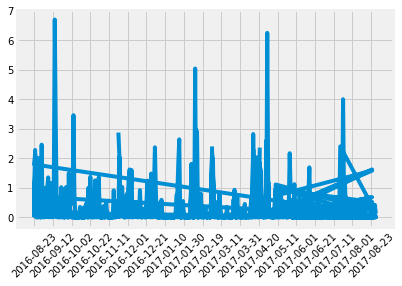

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
date_range = df1.index.unique().tolist()
date_label = []

for i in range(len(date_range)):
    if i % 20 == 0:
        date_label.append(date_range[i])

plt.plot(df1)
plt.xticks(date_label, date_label, rotation = 45, fontsize = 10)
plt.show()

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data



In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data


![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
num_stations = engine.execute("SELECT COUNT(*) FROM Station").fetchall()
num_stations

[(9,)]

In [18]:
station = session.query(Station).first()
station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19e5b2af4a8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations =  engine.execute('SELECT station, COUNT(station) FROM Measurement GROUP BY station ORDER BY COUNT(station) DESC ').fetchall()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_records = engine.execute("SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM Measurement WHERE station = 'USC00519281'").fetchall()
temp_records

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = engine.execute("SELECT tobs, station FROM Measurement WHERE station = 'USC00519281'").fetchall()
most_active_station

[(70.0, 'USC00519281'),
 (62.0, 'USC00519281'),
 (74.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (74.0, 'USC00519281'),
 (76.0, 'USC00519281'),
 (69.0, 'USC00519281'),
 (66.0, 'USC00519281'),
 (70.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (64.0, 'USC00519281'),
 (60.0, 'USC00519281'),
 (61.0, 'USC00519281'),
 (68.0, 'USC00519281'),
 (64.0, 'USC00519281'),
 (66.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (70.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (69.0, 'USC00519281'),
 (60.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (65.0, 'USC00519281'),
 (75.0, 'USC00519281'),
 (69.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (66.0, 'USC00519281'),
 (69.0, 'USC00519281'),
 (72.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (65.0, 'USC00519281'),
 (64.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (67.0, 'USC00519281'),
 (68.0, 'USC00519281'),
 (69.0, 'USC00519281'),
 (66.0, 'USC00519281'),
 (69.0, 'USC00519281'),
 (61.0, 'USC00519281'),
 (71.0, 'USC0051

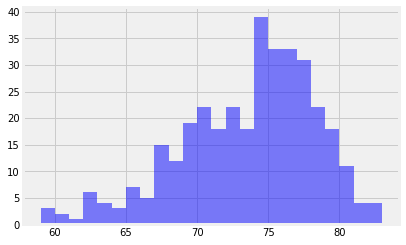

In [41]:
measurement_from_active_station = engine.execute("SELECT tobs FROM Measurement WHERE station = 'USC00519281' AND  date >='2016-08-23' AND date <='2017-08-23'").fetchall()
measurement_from_active_station
active_station_df = pd.DataFrame(measurement_from_active_station, columns =['temperature'])
active_station_df
x = active_station_df['temperature']
min_temp = active_station_df['temperature'].min()
min_temp
max_temp = active_station_df['temperature'].max()
max_temp
bins = int(max_temp - min_temp)
n, bins, patches = plt.hist(x, bins, facecolor = 'blue', alpha = 0.5)
plt.show()

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [42]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [185]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_dates = calc_temps('2016-06-20', '2016-06-28')
trip_dates
trip_dates_df = pd.DataFrame(trip_dates, columns = ['min_temp', 'avg_temp', 'max_temp'])
trip_dates_df

,min_temp,avg_temp,max_temp
0,71.0,76.166667,81.0


<BarContainer object of 3 artists>

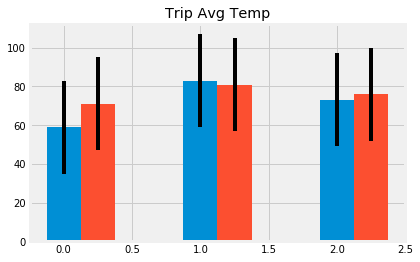

In [194]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp = active_station_df['temperature'].min()
min_temp
max_temp = active_station_df['temperature'].max()
max_temp
avg_temp = active_station_df['temperature'].mean()
values = [min_temp, max_temp, avg_temp]
N = 3
ind = np.arange(N)
yerrbar = int(max_temp - min_temp)
plt.bar(ind, values, yerr = yerrbar, width = 0.25, align = "center")
plt.title("Trip Avg Temp")

min_temp_trip = trip_dates_df['min_temp']
max_temp_trip = trip_dates_df['max_temp']
avg_temp_trip = trip_dates_df['avg_temp']
temp_trip_values = [int(min_temp_trip), int(max_temp_trip), int(avg_temp_trip)]
temp_trip_values
yerrbar_trip = int(max_temp_trip - min_temp_trip)
plt.bar(ind + 0.25, temp_trip_values, yerr=yerrbar, width = 0.25, align = "center")

In [176]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
import datetime as dt
date = dt.datetime(2016, 8, 23)
stations_rainfall = [Measurement.date, Measurement.prcp, Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
total_rainfall_per_station = session.query(*stations_rainfall).filter(Measurement.station == Station.station).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    filter(func.strftime("%d", Measurement.date) == "23").\
    filter(func.strftime("%Y", Measurement.date) == "2016").\
    group_by(Measurement.station).\
    order_by(Measurement.prcp.desc()).\
    all()
  
    #filter(Measurement.date.between('2016-08-23','2017-08-23')).statement
total_rainfall_per_station_df = pd.DataFrame(total_rainfall_per_station, columns = ['date','precipitation', 'station', 'name', 'latitude','longitude', 'elevation'])
total_rainfall_per_station_df.set_index('station', inplace=True)
total_rainfall_per_station_df

,date,precipitation,name,latitude,longitude,elevation
station,,,,,,
USC00516128,2016-06-23,0.90,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
USC00519281,2016-06-23,0.39,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00513117,2016-06-23,0.25,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00514830,2016-06-23,0.10,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00519397,2016-06-23,0.00,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
USC00519523,2016-06-23,0.00,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00517948,2016-06-23,NaN,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [165]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
